In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import math
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [3]:
df = get_stock_data('TSLA')
netflix = get_stock_data('NFLX')
amazon = get_stock_data('YELP')
nike = get_stock_data('AMZN')
starbucks = get_stock_data('SBUX')
yelp = get_stock_data('NKE')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
def get_stock_data(acronym):
    df = yf.download(acronym,'2012-12-15','2020-05-26', interval='1d') 
    return df

def prepare_data(df):
    dates = np.array(df.Date)
    df = df['Open'].values
    return dates, df

In [7]:

netflix = netflix['Open'].values
amazon = amazon['Open'].values
nike = nike['Open'].values
starbucks = starbucks['Open'].values
yelp = yelp['Open'].values

In [8]:
training_data_len = math.ceil(len(tesla)*0.8)
tesla = tesla.reshape(-1,1)

In [ ]:
def splitting_and_scaling():

In [9]:
dates_training = dates[:training_data_len]
dates_validation = dates[training_data_len:]

In [10]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(tesla)

In [11]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[:training_data_len,:]

#split the data into X_train and y_train dataset
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])


[array([8.75911038e-04, 8.64683277e-04, 1.41493354e-03, 1.96518810e-03,
       1.69567470e-03, 1.05558521e-03, 7.18696676e-04, 1.07804501e-03,
       5.61482313e-04, 4.26727758e-04, 0.00000000e+00, 2.24592925e-03,
       2.44806323e-03, 2.02133547e-03, 2.02133547e-03, 1.68444694e-03,
       1.13419239e-03, 9.76978026e-04, 1.16788424e-03, 8.98392263e-05,
       1.23526794e-04, 9.54518219e-04, 1.30263880e-03, 1.95396034e-03,
       1.75182636e-03, 2.26838906e-03, 3.36889388e-03, 4.49185851e-03,
       4.33464414e-03, 5.72711788e-03, 5.44637673e-03, 5.46883653e-03,
       5.80572506e-03, 6.06401070e-03, 5.61482313e-03, 5.81695711e-03,
       6.95114950e-03, 7.24312270e-03, 5.59236333e-03, 6.12015807e-03,
       5.95171166e-03, 6.33351981e-03, 6.17630545e-03, 4.89612646e-03,
       7.07467629e-03, 3.91914843e-03, 3.05446516e-03, 3.53734029e-03,
       1.63952733e-03, 1.58337995e-03, 3.24536709e-03, 2.24592925e-03,
       1.98764790e-03, 3.36889388e-03, 4.50308627e-03, 5.31162217e-03,
     

In [12]:
#Convert the x_train and y_train to numpy arrays

In [13]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
#Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))


In [15]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
#Train the model
model.fit(X_train, y_train, batch_size = 1, epochs = 1)

Epoch 1/1
1438/1438 [==============================] - 106s 74ms/step - loss: 6.4564e-04


In [18]:
#Create the testing dataset
#Create a new array containing scaled values from index(training_lenght to end)
test_data = scaled_data[training_data_len - 60: , :]
X_test = []
y_test = tesla[training_data_len: , : ]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [19]:
#Convert the data to a numpy array
X_test = np.array(X_test)

In [20]:
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
#Get the models predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [23]:
#Get the roor mean squared error (RMSE)
rmse= np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

44.85965706232424

In [25]:
predictions = [i for lst in predictions for i in lst]

In [26]:
tests = [i for lst in tesla[:training_data_len] for i in lst]

In [27]:
validation = [i for lst in tesla[training_data_len:] for i in lst]

In [35]:
df_t = pd.DataFrame({'Date': dates_training, 'Training':tests})
df_t.set_index('Date', inplace=True)
df_vp = pd.DataFrame({'Date':dates_validation, 'Validation':validation, 'Prediction':predictions})
df_vp.set_index('Date', inplace=True)
merged_shit = pd.concat([df_t, df_vp])
merged_shit.head()

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Prediction,Training,Validation
Date,,,
2012-12-14,NaN,33.779999,NaN
2012-12-17,NaN,33.770000,NaN
2012-12-18,NaN,34.259998,NaN
2012-12-19,NaN,34.750000,NaN
2012-12-20,NaN,34.509998,NaN


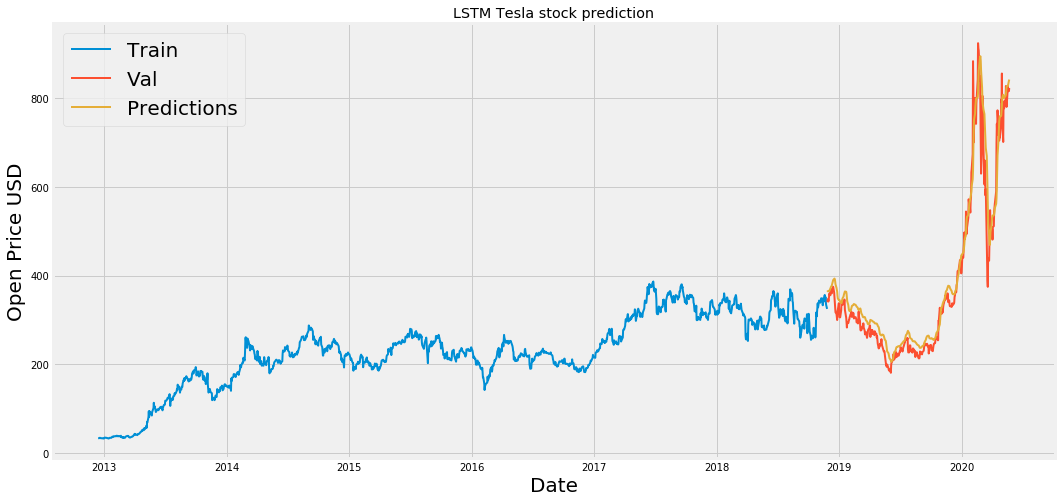

In [44]:
plt.figure(figsize=(16,8))
plt.plot(merged_shit.Training, linewidth=2)
plt.plot(merged_shit.Validation, linewidth=2)
plt.plot(merged_shit.Prediction, linewidth=2)
plt.title('LSTM Tesla stock prediction')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Open Price USD', fontsize = 20)
plt.legend(['Train', 'Val', 'Predictions'],fontsize = 20)
plt.show()
merged_shit = merged_shit[['Prediction', 'Training', 'Validation']].apply(lambda x:(round(x,2)))
merged_shit.to_csv('../02 CSV_files/predictions/tesla_predictions.csv')
